In [1]:
%matplotlib widget
import numpy as np, matplotlib.pyplot as plt
import os, sys, importlib
import pandas as pd, seaborn as sns

sys.path.append('/Users/alexisdevitre/Documents/code/hts-irradiation')
sys.path.append('../../')

from scipy.optimize import curve_fit
import hts_fitting as hts, hts_fitfunctions as ff, hts_misc as misc, hts_dosecalculations as dose, hts_beamspot as bsp
import default_style

for lib in [hts, ff, misc, sns, dose, bsp]:
    importlib.reload(lib)
    
dk = .5

## Fitting procedure for the critical current

### Simplified for main body

<>:29: SyntaxWarning: invalid escape sequence '\m'
<>:29: SyntaxWarning: invalid escape sequence '\m'
/var/folders/jl/4_5mv35x3wb9cccz5qcc6vmc0000gn/T/ipykernel_61671/1690485969.py:29: SyntaxWarning: invalid escape sequence '\m'
  ax.set_ylabel('Voltage [$\mu$V]')


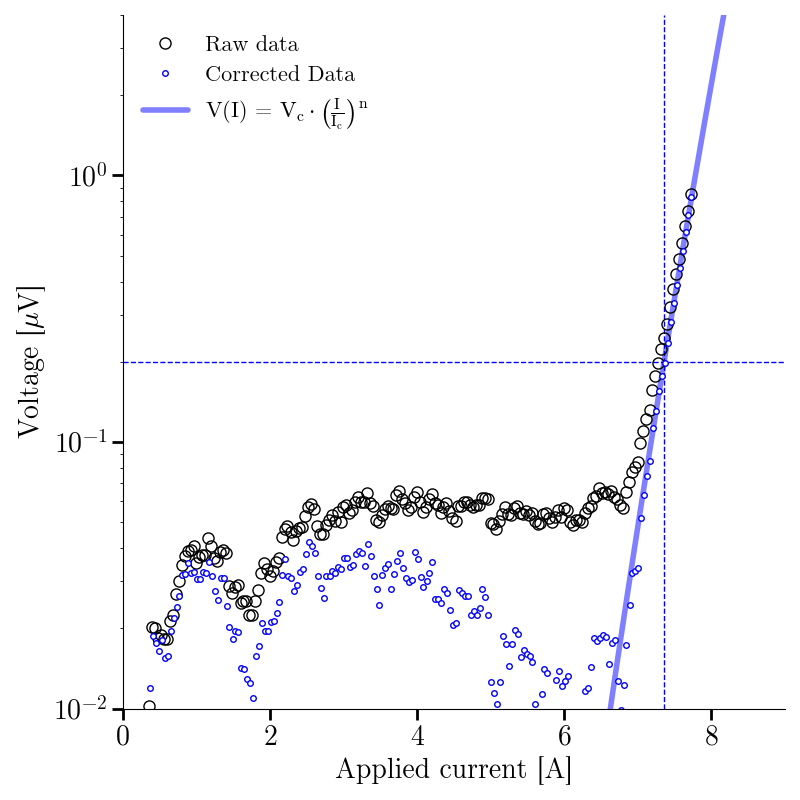

In [16]:
vc = 2e-7
fig, ax = plt.subplots()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

fpath = 'data/Ic_2024-08-14_21-11-13066770_ffj38-80e19pm2-anneal260k-1h-21k.txt'

data = hts.readIV(fpath)
ic, n, current, voltage, chisq, pcov = hts.fitIcMeasurement(fpath, function='linear', vc=vc)

ax.axhline(vc*1e6, color='b', linewidth=1, linestyle='--')
ax.axvline(ic, color='b', linewidth=1, linestyle='--')

ax.axhline(color='k', alpha=.3, linewidth=.5)
#ax.axhspan(-.1, .1, color='gray', alpha=0.2)
ax.set_xlim(0, 9)
ax.set_ylim(1e-2, 4e0)


ax.semilogy(data.current[data.voltage < .9e-6][::4], 1e6*data.voltage[data.voltage < .9e-6][::4], linestyle='None', marker='o', mec='k', mfc='None', label='Raw data')
ax.semilogy(current[voltage<.9e-6][::4], 1e6*voltage[voltage<.9e-6][::4], linestyle='None', marker='.', mec='b', mfc='white', label='Corrected Data')

xsmooth = np.linspace(0, 10, 1000)
ysmooth = ff.powerLaw(xsmooth, ic, n)

ax.plot(xsmooth, 1e6*ysmooth, color='b', linewidth=4, zorder=-1, alpha=.5, solid_capstyle='round', label=r'V(I) = $\rm V_c \cdot \left(\frac{I}{I_c}\right)^n$')

ax.set_xlabel('Applied current [A]')
ax.set_ylabel('Voltage [$\mu$V]')
ax.tick_params(which='both', labelsize=20)
ax.legend(loc='upper left', frameon=False, fontsize=16)

fig.tight_layout()
plt.savefig('modelIV.png', transparent=True, dpi=300)

### Full procedure for the appendix

<IPython.core.display.Javascript object>


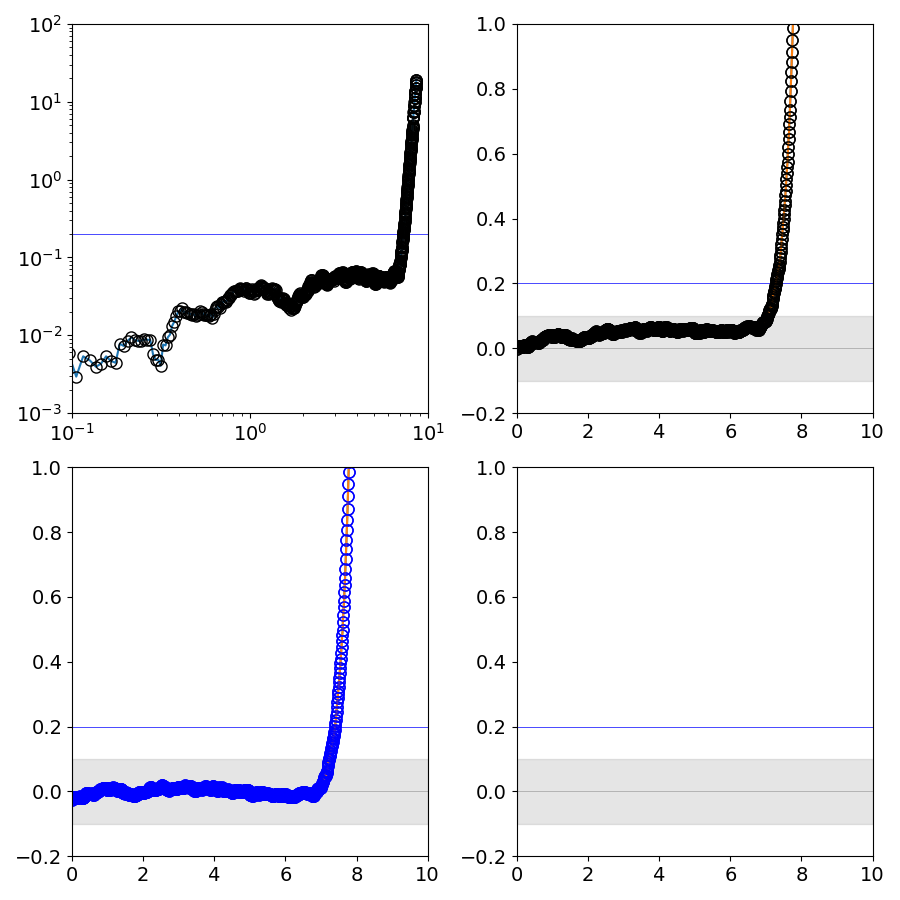

In [49]:
fig, axes = plt.subplots(2, 2, figsize=(9, 9))

fpath = '/Users/alexisdevitre/MIT Dropbox/Alexis Devitre/2020 PhD/Research/data/Coated conductors/FFJ/ffj38/Ic/recovery/anneal260k/001h/Ic_2024-08-14_21-11-13066770_ffj38-80e19pm2-anneal260k-1h-21k.txt'

data = hts.readIV(fpath)
ic, n, current, voltage, chisq, pcov = hts.fitIcMeasurement(fpath)

for i, ax in enumerate(axes.flatten()):
    
    ax.axhline(0.2, color='b', linewidth=.5)
    
    if i != 0:
        ax.axhline(color='k', alpha=.3, linewidth=.5)
        ax.axhspan(-.1, .1, color='gray', alpha=0.2)
        ax.set_xlim(0, 10)
        ax.set_ylim(-0.2, 1)
    else:
        ax.set_xlim(1e-1, 1e1)
        ax.set_ylim(1e-3, 1e2)

axes[0][0].loglog(data.current, 1e6*data.voltage, marker='o', mec='k', mfc='None')
axes[0][1].plot(data.current, 1e6*data.voltage, marker='o', mec='k', mfc='None')
axes[1][0].plot(current, 1e6*voltage, marker='o', mec='b', mfc='None')

#ax.set_xlabel('Applied current [A]')
#ax.set_ylabel('Voltage [$\mu$V]')
fig.tight_layout()

## Fitting procedure for the critical temperature

### Simplified for main body

<IPython.core.display.Javascript object>


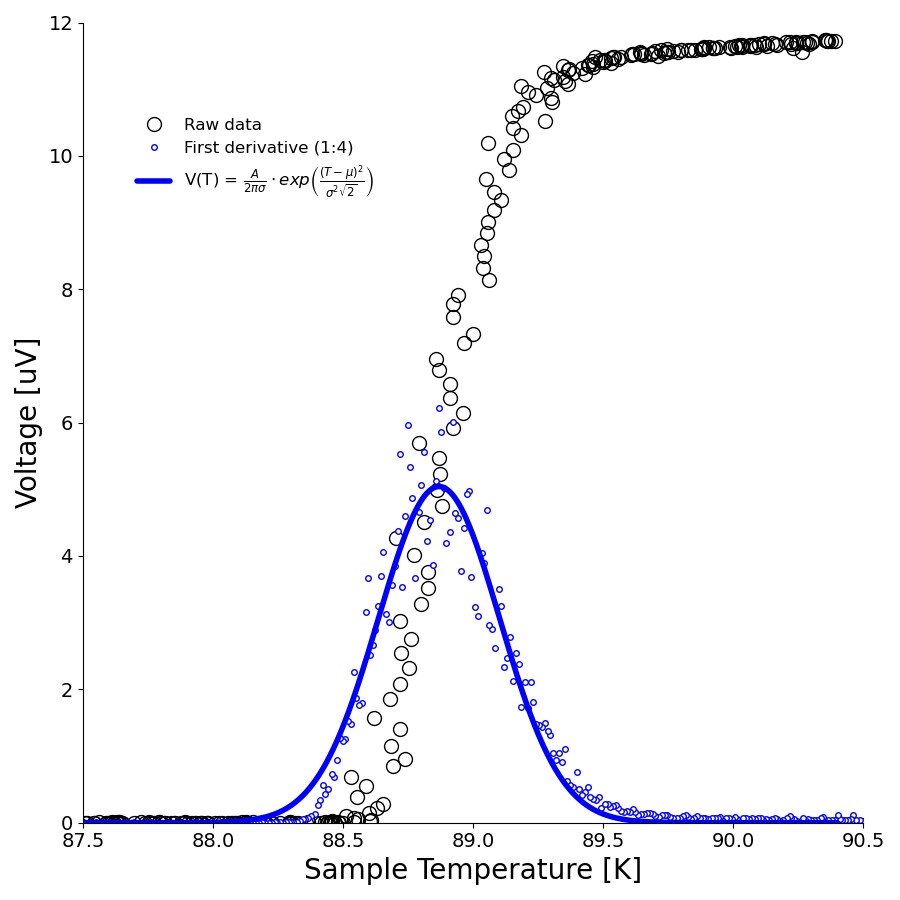

88.869155

In [175]:
fig, ax = plt.subplots(figsize=(9, 9))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel('Sample Temperature [K]')
ax.set_ylabel('Voltage [uV]')
ax.set_xlim(87.5, 90.5)
ax.set_ylim(0, 12)

fpath = '../input/Tc_2024-07-26_14-16-22538770_ffj38-0e0pm2-Sapphire-down-1mA.txt'
data = hts.readTV(fpath)

rdata = data.rolling(40).mean()
vdT, temperature = (rdata.voltage.diff()/rdata.sampleT.diff()), rdata.sampleT
cut = np.isfinite(vdT).values

popt, pcov = curve_fit(ff.gaussian, temperature[cut], vdT[cut], p0=[2, rdata.sampleT[(rdata.voltage-rdata.voltage.max()/2).abs().argmin()], 1])

xsmooth = np.linspace(86, 90.4, 1000)
ysmooth = ff.gaussian(xsmooth, *popt)
    

cut = data.sampleT < 90.4
#ax.axvline(temperature[np.argmax(vdT)], color='b', linewidth=.5, linestyle='--')
ax.plot(data.sampleT[cut], 1e6*data.voltage[cut], linestyle='None', marker='o', mec='k', mfc='None', label='Raw data', markersize=10, zorder=-1)
ax.plot(temperature[cut], 1e6*vdT[cut]/4, mec='b', mfc='white', marker='.', linestyle='None', label=r'First derivative (1:4)', zorder=0)
ax.plot(xsmooth, 1e6*ysmooth/4, color='b', solid_capstyle='round', linewidth=4, label=r'V(T) = $\frac{A}{2\pi \sigma} \cdot exp \left(\frac{(T-\mu)^2}{\sigma^2 \sqrt{2}}\right)$', zorder=1)

ax.legend(loc='upper left', frameon=False, bbox_to_anchor=(0.05, 0.9))
fig.tight_layout()

plt.savefig('modelTV.png', transparent=True, dpi=300)
temperature[np.argmax(vdT)]